<a href="https://colab.research.google.com/github/kwakguanghee/BIGDATA/blob/main/%EB%94%B0%EB%A6%89%EC%9D%B4_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D_1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
titanic = sns.load_dataset("titanic")
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [3]:
# Titanic 데이터셋 로드 (예시로 seaborn의 Titanic 데이터셋 사용)
df = sns.load_dataset('titanic')

# 데이터프레임의 첫 몇 줄 확인
print(df.head())

# 컬럼 데이터 유형 확인
print(df.dtypes)

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who

In [23]:
titanic.info()
#타이타닉 열(변수) 설명
#survived : 0 = 사망, 1 = 생존
#pclass : 1 = 1등석, 2 = 2등석, 3 = 3등석
#sex : male = 남성, female = 여성
#age : 나이
#sibsp : 타이타닉 호에 동승한 자매 / 배우자의 수
#parch : 타이타닉 호에 동승한 부모 / 자식의 수
#fare : 티켓 요금
#embarked : 탑승지, C = 셰르부르, Q = 퀸즈타운, S = 사우샘프턴
#class : First = 1등석, Second = 2등석, Third = 3등석
#who : 남/여/아이, 'man', 'woman', 'child'
#adult_male : 남자 어른, True/False
#deck : 방 위치, 'A', 'B', 'C', 'D', 'E', 'F', 'G', NaN
#embark_town : 탑승지
#alive : 생존, yes/no
#alone : 1인 탑승, True/False

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [30]:
# 전체 인원 수 계산
total_passengers = df.shape[0]
print(f"타이타닉에 탑승한 전체 인원 수: {total_passengers}명")

타이타닉에 탑승한 전체 인원 수: 891명


In [31]:
#생존자 수 vs 사망자 수
df['survived'].value_counts()
#사망자는 424명, 생존자는 290명으로 사망자가 더 많다는 것을 확인

survived
0    549
1    342
Name: count, dtype: int64

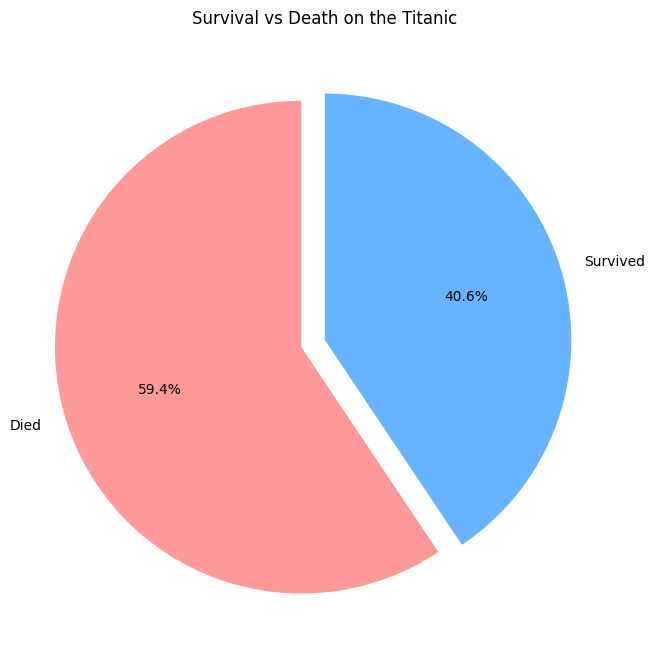

In [33]:
# 파이 차트로 시각화
labels = ['Died', 'Survived']
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)  # 첫 번째 조각을 분리

plt.figure(figsize=(8, 8))
plt.pie(survival_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, explode=explode)
plt.title('Survival vs Death on the Titanic')
plt.show()

In [32]:
# 남자와 여자의 인원 수 계산
gender_counts = df['sex'].value_counts()
print(gender_counts)

# 결과 출력
male_count = gender_counts['male']
female_count = gender_counts['female']
print(f"남자: {male_count}명")
print(f"여자: {female_count}명")

sex
male      577
female    314
Name: count, dtype: int64
남자: 577명
여자: 314명


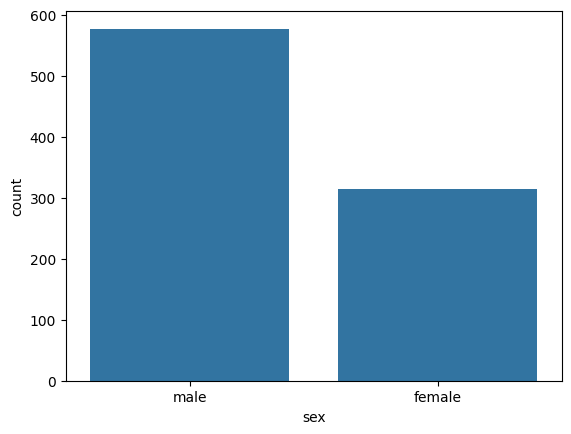

In [5]:
sns.countplot(titanic, x = "sex");

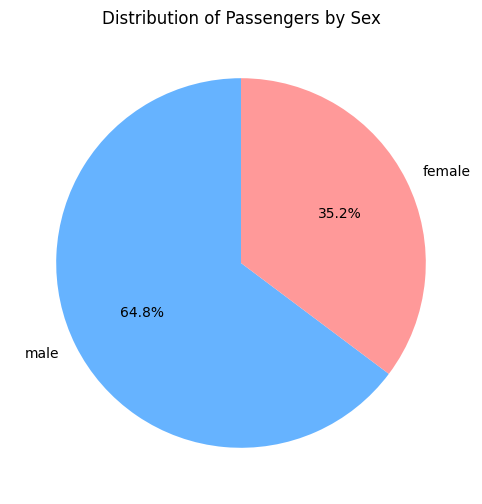

In [6]:
# titanic 데이터셋 로드
titanic = sns.load_dataset("titanic")

# 성별 데이터 집계
sex_counts = titanic['sex'].value_counts()

# 원형 그래프 그리기
plt.figure(figsize=(8, 6))
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#ff9999'])
plt.title('Distribution of Passengers by Sex')
plt.show()

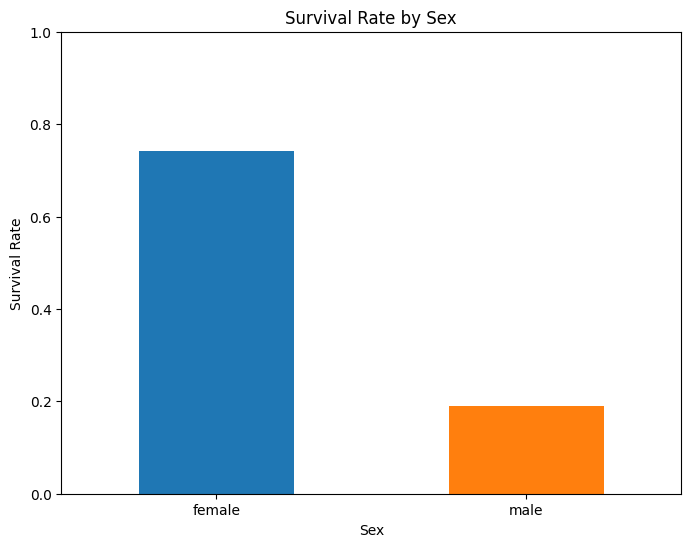

In [41]:
# 성별에 따른 생존률 계산
survival_by_sex = titanic.groupby('sex')['survived'].mean()

# 바 차트 그리기
plt.figure(figsize=(8, 6))
survival_by_sex.plot(kind='bar', color=['#1f77b4', '#ff7f0e'])
plt.title('Survival Rate by Sex')
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.show()
#성별과 생존률의 차이
#성별을 groupby로 진행, 평균값 중 survived에 대한 차트
#bar 차트, x축 값은 성별로 나뉨(male,female)
#예를 들어 생존자가 6명,사망자가 4명이라고 쳤을떄, (1+1+1+1+1+1 +0+0+0+0)/10=60%
#즉, 아래 그래프는 성별 생존률을 의미하며, 여성의 경우 생존률이 70%, 남성은 20%정도가 생존한것을 확인할수 있음

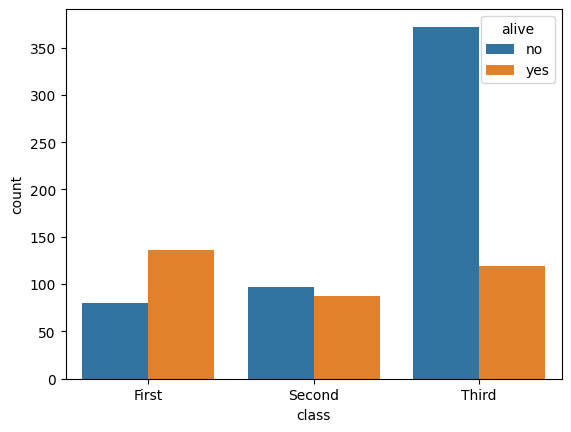

In [9]:
sns.countplot(data = titanic, x = 'class', hue = 'alive');  # x축 class, alive별 색 표현

<Axes: xlabel='pclass', ylabel='survived'>

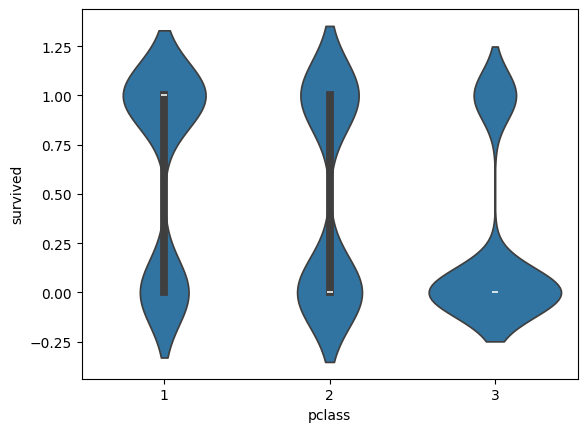

In [47]:
#객실등급 별로 사망자 수가 얼마나 차이가 나는지
sns.violinplot(data=df,x='pclass',y='survived')
#1등급으로 갈수록 좋은 객실임을 의미
#생존부터 보자면, 3으로 갈수록, 즉 객실이 안좋아질수록 사망자가 증가
#반대로 1로 갈수록,즉 객실이 좋아질수록 생존자가 증가
#이를 통해, 알 수있는 점: 좋은 객실에 있떤 사람을 우선으로 대피시켰을 가능성이 있다

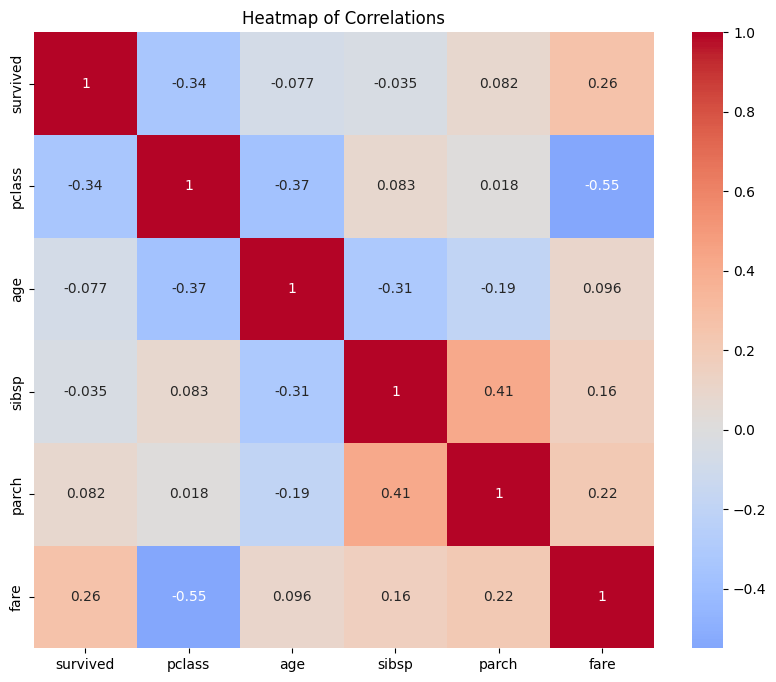

객실 등급과 생존율의 상관계수: -0.34


In [56]:
# titanic 데이터셋 로드
titanic = sns.load_dataset("titanic")

# 숫자형 데이터만 선택
numeric_df = titanic.select_dtypes(include=['float64', 'int64'])

# 상관계수 히트맵 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Heatmap of Correlations')
plt.show()

# 객실 등급과 생존율의 상관계수 계산
class_survival_corr = numeric_df[['pclass', 'survived']].corr().iloc[0, 1]
print(f"객실 등급과 생존율의 상관계수: {class_survival_corr:.2f}")

# 해석
# 객실 등급과 생존율은 -0.36의 상관관계를 가짐.
# 생존율이 1이면 생존, 0이면 사망을 의미함.
# 객실 등급이 높아질수록(즉, 객실이 낮아질수록) 생존율이 낮아짐을 의미함.

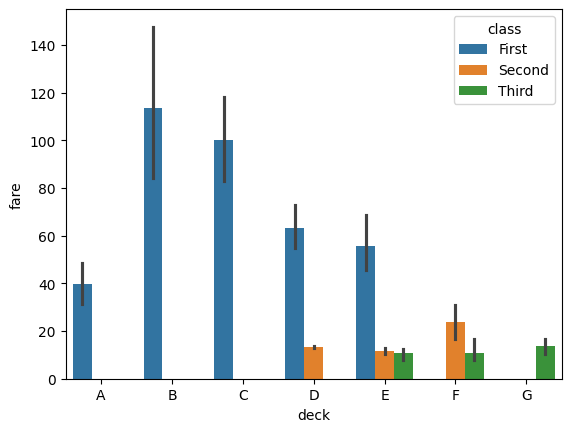

In [44]:
sns.barplot(titanic, x="deck", y="fare", hue='class');
#deck : 방 위치, 'A', 'B', 'C', 'D', 'E', 'F', 'G', NaN

In [62]:
# 데크별 생존율 계산
deck_survival_rate = titanic.groupby('deck')['survived'].mean().reset_index()

print(deck_survival_rate)

  deck  survived
0    A  0.466667
1    B  0.744681
2    C  0.593220
3    D  0.757576
4    E  0.750000
5    F  0.615385
6    G  0.500000


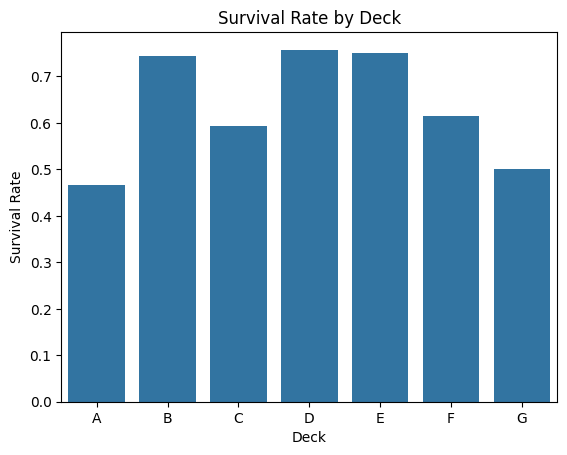

In [65]:
# 데크별 생존율 시각화
sns.barplot(x='deck', y='survived', data=deck_survival_rate)
plt.xlabel('Deck')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Deck')
plt.show()

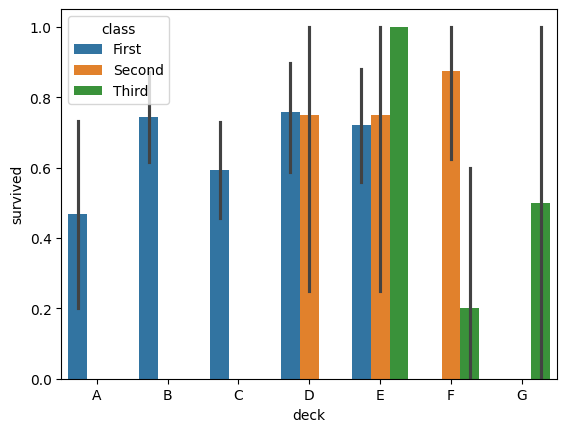

In [46]:
sns.barplot(titanic, x="deck", y="survived", hue='class');

In [13]:
# 필요없는 컬럼 제거
df.drop(columns=['sibsp', 'parch', 'embarked', 'class', 'adult_male', 'embark_town', 'alive', 'deck'], inplace=True, errors='ignore')

# 제거 후 데이터프레임 확인
print(df.head())
print(df.dtypes)

   survived  pclass     sex   age     fare    who  alone
0         0       3    male  22.0   7.2500    man  False
1         1       1  female  38.0  71.2833  woman  False
2         1       3  female  26.0   7.9250  woman   True
3         1       1  female  35.0  53.1000  woman  False
4         0       3    male  35.0   8.0500    man   True
survived      int64
pclass        int64
sex          object
age         float64
fare        float64
who          object
alone          bool
dtype: object


In [34]:
df.dropna(axis=0,inplace=True)
df.shape
#결측치가 있는 값들을 제거
#axis=0을 기준으로 dropna를 통해 null값들을 제거
#inplace=True를 통해 원본인 df에도 반영

(182, 15)

<Axes: xlabel='age', ylabel='Count'>

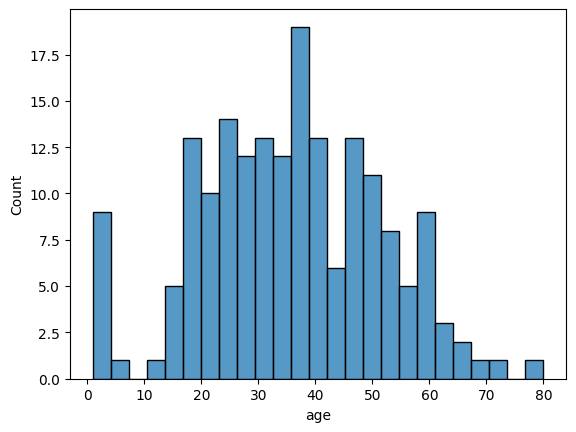

In [35]:
#타이타닉호의 탑승자의 나이 분포
sns.histplot(data=df,x='age',bins=25)
#이 그래프를 통해 2~30대가 많은 것을 확인할수 있다.

In [49]:
age_band = []              # 각 로우별로 연령대를 저장할 리스트 생성
for age in titanic['age']:

    band = ''
    if   age < 20:  band = '청소년'
    elif age < 40:  band = '청년'
    elif age < 60:  band = '장년'
    elif age < 150: band = '노년'
    else:           band = '제외'

    age_band.append(band)

print( 'age_band 리스트 개수: ', len(age_band))

# titanic 데이터프레임에 연령대 정보를 추가

titanic['연령대'] = age_band
print( 'titanic 개수: ', len(titanic))

age_band 리스트 개수:  891
titanic 개수:  891


In [50]:
# 데이터프레임 확인하기 - 연령대 확인

titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,연령대
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,청년
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,청년
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,청년
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,청년
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,청년


In [51]:
# 연령대별 생존자 수 피봇 만들기

titanic.pivot_table(index='연령대', columns='survived', values='class', aggfunc='count')

survived,0,1
연령대,,
노년,19,7
장년,83,54
제외,125,52
청년,237,150
청소년,85,79


In [52]:
# 연령대별 생존자 수 정보를 'age_band_pivot' 데이터프레임에 저장합니다.

age_band_pivot = titanic.pivot_table(index='연령대', columns='survived', values='class', aggfunc='count')


# 기초통계량을 확인합니다.(0: 사망, 1:생존)

age_band_pivot.describe()

survived,0,1
count,5.000000,5.000000
mean,109.800000,68.400000
std,80.605211,52.481425
min,19.000000,7.000000
25%,83.000000,52.000000
50%,85.000000,54.000000
75%,125.000000,79.000000
max,237.000000,150.000000


In [53]:
# 'age_band_pivot'에서 생존울을 계산합니다.

age_band_pivot['life_rate'] = \
round(age_band_pivot[1] / (age_band_pivot[0] + age_band_pivot[1]) * 100, 1)

age_band_pivot

survived,0,1,life_rate
연령대,,,
노년,19,7,26.9
장년,83,54,39.4
제외,125,52,29.4
청년,237,150,38.8
청소년,85,79,48.2


In [70]:
#생존률에 어느변수가 가장 큰 영향을 미쳤을까?
# titanic 데이터셋 로드
titanic = sns.load_dataset("titanic")

# 숫자형 데이터만 선택
numeric_df = titanic.select_dtypes(include=['float64', 'int64'])

# 생존률과의 상관관계 계산 및 정렬
survival_corr = numeric_df.corr()['survived'].sort_values(ascending=False)
print(survival_corr)
#가장 강한 상관관계는 -0.35로 약한 음의 상관관계를 갖고있는 pclass, 즉 객실등급이 가장 큰 영향을 미쳤다고 할 수 있음.
#fare --> 객실요금은 객실등급과도 연관이 되있으므로, 이 또한 상관관계가 있다고 볼 수 있음.

survived    1.000000
fare        0.257307
parch       0.081629
sibsp      -0.035322
age        -0.077221
pclass     -0.338481
Name: survived, dtype: float64


   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
  embarked  survived
0        C  0.553571
1        Q  0.389610
2        S  0.336957


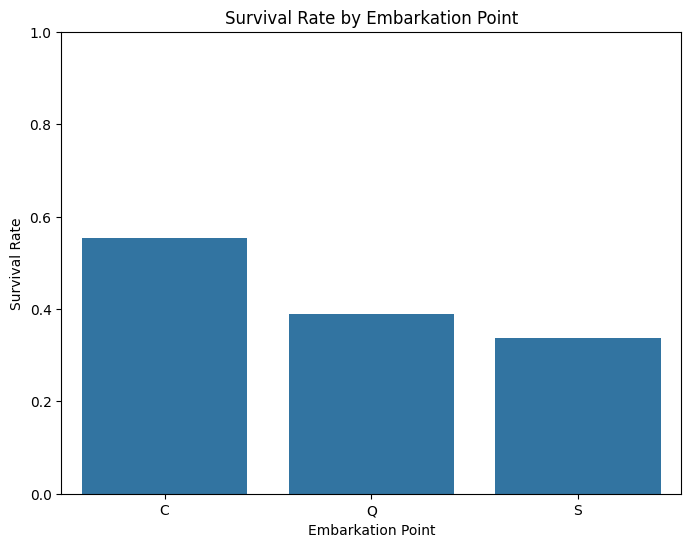

In [57]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Seaborn의 타이타닉 데이터셋을 로드합니다.
titanic = sns.load_dataset('titanic')

# 데이터셋의 구조를 확인합니다.
print(titanic.head())

# 생존 여부와 탑승 항구(Sex, Embarked) 열을 선택하고 결측치를 제거합니다.
titanic = titanic[['survived', 'embarked']].dropna()

# 탑승 항구별 생존율을 계산합니다.
embarked_survival_rate = titanic.groupby('embarked')['survived'].mean().reset_index()

# 결과를 출력합니다.
print(embarked_survival_rate)

# 시각화를 통해 탑승 항구별 생존율을 확인합니다.
plt.figure(figsize=(8, 6))
sns.barplot(x='embarked', y='survived', data=embarked_survival_rate)
plt.title('Survival Rate by Embarkation Point')
plt.xlabel('Embarkation Point')
plt.ylabel('Survival Rate')
plt.ylim(0, 1)
plt.show()

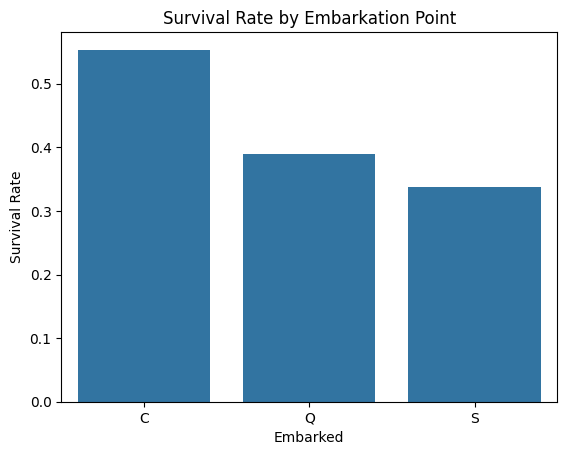

In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 예제 데이터프레임 생성
data = {'embarked': ['C', 'Q', 'S'], 'survived': [0.553571, 0.389610, 0.336957]}
df = pd.DataFrame(data)

# 시각화
sns.barplot(x='embarked', y='survived', data=df)
plt.xlabel('Embarked')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Embarkation Point')
plt.show()

# **자전거** **대여**

In [ ]:
## 주제: 자전거 대여
# 기본 패키지 불러오기

import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn")
sns.set(font_scale = 1)
sns.set_style("whitegrid")

import plotly.express as px

import chart_studio.plotly as py
import cufflinks as cf
cf.go_offline(connected=True)

import plotly.graph_objects as go
import plotly.offline as pyo
pyo.init_notebook_mode()

from plotly.subplots import make_subplots

import warnings # 경고 메세지 숨기기
warnings.filterwarnings("ignore")

plt.rcParams["font.family"] = 'S-Core Dream' # 한글 폰트 가져오기
plt.rcParams['axes.unicode_minus'] = False # - 기호 깨짐 해결


In [ ]:
# 데이터 불러오기

bike_1 = pd.read_csv("공공자전거 대여소 정보_csv", encoding="cp949")
bike_2 = pd.read_csv("서울특별시_공공자전거_이용정보(월별).csv", encoding="cp949")
bike_3 = pd.read_csv("서울특별시_공공자전거_이용정보(시간대별).csv", encoding="cp949")

print(bike_1.shape)
print(bike_2.shape)
print(bike_3.shape)

bike_1.head()
#bike_2.head()
#bike_3.head()

In [ ]:
# 데이터 기본 정보 확인

#bike_1.info()
#bike_2.info()
bike_3.info()

In [ ]:
# 수치형 데이터 통계 확인

#bike_1.describe()
#bike_2.describe()
bike_3.describe()

In [ ]:
# 범주형 데이터 통계 확인

#bike_1.describe(include = np.object_)
#bike_2.describe(include = np.object_)
bike_3.describe(include = np.object_)

In [ ]:
# bike_1 데이터 결측치 확인

bike_1.isnull().sum()

In [ ]:
# bike_1 데이터 결측치 시각화

msno.bar(bike_1)

In [ ]:
# bike_2 데이터 결측치 확인

bike_2.isnull().sum()

In [ ]:
# bike_3 데이터 결측치 확인

bike_3.isnull().sum()

In [ ]:
# bike_3 데이터 결측치 시각화 //여기까지가 데이터분석 1

msno.bar(bike_3)

NameError: name 'msno' is not defined

In [ ]:
## 3-1 컬럼명 바꾸기
# bike_1 데이터 컬럼명 바꾸기

bike_1.columns = ['대여소번호', '대여소명', '자치구', ' 상세주도', '위도', '경도', '설치시기', '거치대수lcd', '거치대수qr', '운영방식']

bike_1.head(1)

NameError: name 'bike_1' is not defined

In [ ]:
# bike_2 데이터 컬럼명 바꾸기

bike_2.columns = ['대여소명', '대여일자/월', '대여건수']

bike_2.head(1)

In [ ]:
## 3-2 필요없는 컬럼 삭제하기

#bike_1 = bike_1.drop(["상세주소", "위도", "경도"], axis = 1)

print(bike_1.shape)
bike_1.head()

In [ ]:
## 3-3 결측치 처리하기

# bike_1 데이터에서 설치시기가 NaN인 데이터는 수가 매우 적으므로 삭제

dp = bike_1[bike_1["설치시기"].isnull()]
bike_1 = bike_1.drop(dp.index)

bike_1.isnull().sum()

In [ ]:
# bike_1 데이터에서 운영방식에 따라 LCD 또는 QR 거치대의 수가 결정되기 때문에
# 거치대수lcd, 거치대수qr 컬럼의 NaN 값은 0으로 처리

bike_1 = bike_1.fillna(0)

bike_1.isnull().sum()

In [ ]:
# 성별 컬럼 분류 확인

bike_3["성별"].nunique()

In [ ]:
# bike_3 데이터의 성별 값 통일

bike_3[bike_3["성별"] =="f"] = "F"
bike_3[bike_3["성별"] =="m"] = "M"

bike_3["성별"].unique()

In [ ]:
# bike_2 데이터의 대여소명 앞 숫자 분리

bike_2["대여소번호"] = bike_2["대여소명"].str.split(",", expand = Ture)[0]

# 대여소명은 숫자를 땐 값으로 새로운 컬럼 값으로 지정

bike_2["대여소명_new"] = bike_2["대여소명"].str.split(",", expand = True)[1]

print(bike_2.shape)
print(bike_2.isnull().sum())

bike_2.head()

In [ ]:
bike_2[bike_2["대여소명_new"].isnull()].head()

In [ ]:
# bike_2 데이터의 대여소명_new 값이 None 인 데이터 삭제

bike_2 = bike_2.dropna(subset = ["대여소명_new"])

print(bike_2.shape)
print(bike_2.isnull().sum())

bike_2.head()

In [ ]:
# bike_3 데이터의 대여소명 앞의 숫자가 삭제된 새로운 대여소명 컬럼 생성

bike_3["대여소명_new"] = bike_3["대여소명"].str.split(",", expand = True)[1]

print(bike_3.shape)
print(bike_3.isnull().sum())

bike_3.head()

NameError: name 'bike_3' is not defined

In [ ]:
# bike_3 데이터의 대여소명_new 값이 None 인 데이터 삭제

bike_3 = bike_3.dropna(subset = ["대여소명_new"])

print(bike_3.shape)
print(bike_3.isnull().sum())

bike_3.head()

In [ ]:
## 3-4 컬럼 타입 변경

# bike_1 데이터의 대여소번호를 object 타입으로 변경

bike_1["대여소번호"] = bike_1["대여소번호"].astype("object")

bike_1.info()

In [ ]:
# bike_3 데이터의 이용건수, 이동거리, 사용시간을 수치형 데이터로 변경

bike_3["이용건수"] = pd.to_numeric(bike_3["이용건수"])
bike_3["이동거리"] = pd.to_numeric(bike_3["이동거리"])
bike_3["사용시간"] = pd.to_numeric(bike_3["사용시간"])

bike_3.info()

In [ ]:
# bike_3 데이터의 운동량과 탄소량을 수치형으로 변경하려고 하면 "\n" 이라는 값 때문에 변경이 안됨
# 따라서, "\n" 값을 -1로 변경 후 수치형으로 변경(-1인 이유는 실제로 0인 데이터와 구분짓기 위함)

# bike_3 데이터의 운동량, 탄소량 컬럼의 "\n" 값을 -1로 변경

bike_3["운동량"][bike_3["운동량"] == r"\n"] = -1
bike_3["탄소량"][bike_3["탄소량"] == r"\n"] = -1

NameError: name 'bike_3' is not defined

In [ ]:
# bike_1 데이터의 설치시기, bike_3 데이터의 대여일자를 날짜 타입으로 변경 // 데이터분석 2

bike_1["설치시기"] = pd.to_datetime(bike_1["설치시기"])
bike_3["대여일자"] = pd.to_datetime(bike_3["대여일자"])

bike_1.info()
#bike_3.info()


In [ ]:
bike_3_moving=bike_3.groupby("대여소명_new")["이동거리"].mean().reset_index().sort_values(by="이동거리",ascending=False)

bike_3_moving.head()

In [ ]:
bike_3_moving_top20=bike_3_moving.head(20).sort_values(by="이동거리",ascending=True)

fig=px.bar(bike_3_moving_top20,y="대여소명_new",x="이동거리",orientation="h",color="이동거리")

fig.update_layout(
    title=dict(
        text="<b>평균 이동거리가 큰 대여소 top20</b>"
        font_size=20
    ),

    yaxis=dict(
        title="대여소명"
    )
)
fig.show()

In [ ]:

#평균 사용시간이 많은 순서대로 대여소명 확인

bike_3_time=bike_3.groupby("대여소명_new")["사용시간"].mean().reset_index().sort_values(by="사용시간",ascending=False)

bike_3_time.head()

In [ ]:

from weakref import proxy
# 평균 사용시간이 많은 대여소 top20 시각화

bike_3_time_top20=bike_3_time.head(20).sort_values(by="사용시간",ascending=True)

fig=px.bar(bike_3_time_top20,x="사용시간",y="대여소명_new",orientation="h",color="사용시간")

fig.update_layout(
    title=dict(
        text="<b>평균 사용시간이 많은 대여소 top20</b>"
        font_size=20
    ),

    yaxis=dict(
        title="대여소명"
    ),

    template="plotly_white"
)
fig.show()

In [ ]:

# 운동량과 이동거리의 상관관계 시각화

f, ax=plt.subplots(1,1,figsize=(18,8))

sns.scatterplot(data=bike_3,x="이동거리",y="운동량")

ax.set_xlim(-10000,150000) # x축 범위 조정
ax.set_title("운동량과 이동거리의 상관관계",size=20)

plt.show()

In [ ]:
# 성별/연령대별 이동거리와 운동량의 상관관계 시각화(runtime=16sec)

import time #runtime 시간 측정

start=time.time() #시작 시간

f, ax=plt.subplots(1,2,figsize=(18,8))

sns.scatterplot(data=bike_3,x="이동거리",y="운동량",hue="성별",ax=ax[0])
ax[0].set_xlim(-10000,150000) #x축 범위 조정
ax[0].set_title("운동량과 이동거리 상관관계(성별)",size=20)

sns.scatterplot(data=bike_3,x="이동거리",y="운동량",hue="연령대코드",ax=ax[1])
ax[1].set_xlim(-10000,150000) #x축 범위 조정
ax[1].set_title("운동량과 이동거리 상관관계(연령대)",size=20)

plt.show()

end=time.time() #종료 시간

print("runtime",end-start) #실행 시간

In [ ]:
# 따릉이를 가장 많이 이용하는 성별 확인

bike_3["성별"].value_counts()

In [ ]:
# 따릉이를 가장 많이 이용하는 성별 시각화

bike_3_sex=bike_3["성별"].value_counts().reset_index()
bike_3_sex.columns=["성별","이용 수"]

fig=px.bar(bike_3_sex,x="성별",y="이용 수",color="성별")

fig.update_layout(
    title=dict(
        text="<b>성별에 따른 따릉이 이용 수</b>"
        font_size=20
    ),
    showlegend=False
)
fig.show()

In [ ]:
# bike_3 데이터의 대여일자 컬럼을 연/월/일로 구분

bike_3["대여일자_연"]=bike_3["대여일자"].dt.year
bike_3["대여일자_월"]=bike_3["대여일자"].dt.month
bike_3["대여일자_일"]=bike_3["대여일자"].dt.day

bike_3.head()

In [ ]:

# 일별/성별 사용시간 확인

bike_3_hour=pd.pivot_table(data=bike_3,
                           index="대여일자_일",
                           columns="성별",
                           values="사용시간",
                           aggfunc="sum")
bike_3_hour.head()

In [ ]:
from tempfile import template
# 일별/성별 사용시간 시각화

layout=dict(
    title=dict(
        text="<b>일별/성별에 따른 따릉이 사용시간</b>"
        font_size=20
    ),

    xaxis=dict(
        title="대여일"
        dtick=1
    ),

    yaxis=dict(
        title="사용시간"
    ),

    template="plotly_white"
)

bike_3_hour.iplot(kind="line",layout=layout)

In [ ]:
# 따릉이를 가장 많이 이용하는 연령대 확인

bike_3["연령대코드"].value_counts()

In [ ]:
# 따릉이을 가장 많이 이용하는 연령대 시각화

bike_3_age=bike_3["연령대코드"].value_counts().reset_index()
bike_3_age.columns=["연령대","이용 수"]

fig=px.bar(bike_3_age,x="연령대",y="이용 수",color="연령대")

fig.update_layout(
    title=dict(
        text="<b>연령대에 따른 따릉이 이용 수</b>"
        font_size=20
    ),
    showlegend=False
)
fig.show()

In [ ]:
# 일별/연령대별 사용시간 확인

bike_3_age_hour=pd.pivot_table(data=bike_3,
                               index="대여일자_일",
                               columns="연령대코드",
                               values="사용시간",
                               aggfunc="sum")
bike_3_age_hour.head()

In [ ]:
# 일별/연령대별 사용시간 시각화

layout=dict(
    title=dict(
        text="<b>일별/연령대에 따른 따릉이 사용시간</b>",
        font_size=20
    ),

    xaxis=dict(
        title="대여일"
        dtick=1
    ),

    yaxis=dict(
        title="사용시간"
    ),

    #template="plotly_white"
)

bike_3_age_hour.iplot(kind="line",layout=layout)

In [ ]:
# lcd 거치대와 qr 거치대 수 합하기

bike_1["총거치대수"]=bike_1["거치대수lcd"] + bike_1["거치대수qr"]

print(bike_1.shape)
bike_1.head()

In [ ]:
# 자치구별 거치대 수 확인

bike_1_region=bike_1.groupby("자치구")["총거치대수"].sum().reset_index()
bike_1_region=bike_1_region.set_index("자치구")

bike_1_region.sort_values(by="총거치대수",ascending=False).head()

In [ ]:
# folium 으로 서울 지도위에 거치대 수 분포 확인

import json
import folium

geo_path="data/skorea_municipalities_geo_simple.json" #json파일 위치
geo_str=json.load(open(geo_path,encoding="utf-8")) #json파일 읽기

bike_1_map=folium.Map(location=[37.5502,126.982],zoom_start=11,tiles="Stamen Toner")
#location=서울 위치
#tiles="OpenStreetMap", "Stamen Terrain"

bike_1_map.choropleth(
    geo_data=geo_str,
    data=bike_1_region["총거치대수"],
    columns=["자치구","총거치대수"],
    fill_color="YIGnBu",
    key_on="feature.properties.name",
    legend_name="자치구별 따릉이 총 거치대 수"
)

bike_1_map

In [ ]:
# 대여소번호를 수치형 데이터로 변경

bike_1["대여소번호"]=pd.to_numeric(bike_1["대여소번호"])
bike_2["대여소번호"]=pd.to_numeric(bike_2["대여소번호"])

bike_1.info()

In [ ]:
# 대여소명에 자치구 붙이기

bike_merge=pd.merge(bike_1,bike_2,left_on="대여소번호",right_on="대여소번호")

bike_merge.head()


In [ ]:
# 필요한 컬럼만 사용

bike_merge_1=bike_merge[["대여소번호","대여소명_x","자치구","총거치대수","대여일자/월","대여건수"]]

bike_merge_1.head()


In [ ]:
# 202001 데이터만 사용

bike_merge_1=bike_merge_1[bike_merge_1["대여일자/월"]==202001]

bike_merge_1.head()

In [ ]:

# 자치구별 대여건수 확인

bike_merge_1=bike_merge_1.groupby("자치구")["대여건수"].sum().reset_index()
bike_merge_1=bike_merge_1.set_index("자치구")

bike_merge_1.sort_values(by="대여건수",ascending=False).head()

In [ ]:
# 지도에 자치구별 대여건수 나타내기

bike_merge_1_map=folium.Map(location=[37.5502,126.982],zoom_start=11,tiles="OpenStreetMap")

bike_merge_1_map.choropleth(
    geo_data=geo_str,
    data=bike_merge_1["대여건수"],
    columns=["자치구","대여건수"],
    fill_color="PuRd",
    key_on="feature.properties.name",
    legend_name="자치구별 따릉이 대여건수"
)

bike_merge_1_map